# Budgeted portfolio optimization via bayesian optimization

## 1. The budgeted portfolio optimization problem

### Online social platforms

Let us first describe a generic social network platform,
such as Facebook, Twitter or Instagram. A set of users generate and share some content, denoted as posts, through the platform. Each user has a list of followers and a list of leaders. A user can simultaneously be follower and/or leader of others. As a follower, he (she) is interested in the content posted
by his (her) leaders. With each user a Newsfeed is associated, which is a list of received posts.

We consider a constant number $N$ of active users in a specific time window, forming
the set $\mathcal{N}$. Users are labelled by an index $n=1,...,N$. They can be nodes of a friendship graph, which we do not need to know. We denote by $\lambda^{(n)}$ [posts/time window] the rate with which user $n$ generates new posts, and  we make the assumption that content posted instantaneously appears on the Newsfeeds of his followers and can be further propagated through the social network - depending on the platform. For all users $n \in \mathcal{N}$ we suppose that they keep a constant post rate $\lambda^{(n)}$ during the time-window.

At each point in time, a user sees in his (her) Newsfeed posts originated by other users who may or may not be their direct leaders, depending on the type of platform. The number of these viewed posts are called \textit{impressions} and the \textit{impression ratio} is the ratio of the impressions originated by some given user over all viewed impressions in a given snapshot. The average ratio over several snapshots is called the \textit{average impression ratio} in the time window.

Let us denote by $p^{(j)}_n$ the average impression ratio of posts that originate from user $n$ in the Newsfeed of user $j$. This quantity $p^{(j)}_n$ is assumed known for the rest of the article and can be measured or estimated in two ways:
- Empirically, by taking multiple Newsfeed snapshots in the time window and calculating the average of the ratio of impressions between pairs of users over those time points.
- By Markovian analysis. Namely, if we assume complete knowledge of the social graph and user posting activity, the values $p^{(j)}_n$ can be derived using the Markovian diffusion model already introduced.


Naturally, the average impression ratios satisfy for each Newsfeed:
\begin{equation}
\sum_{n \in \mathcal{N}}  p^{(j)}_n=1, \ \forall j \in \mathcal{N}.
\end{equation}


Our model does not require explicit knowledge of the list of followers and leaders of each user, nor a diffusion process as in the approach by Kempe et al.. However, it does require knowledge over the average impression ratio, that contains all this information resulting from diffusion. Furthermore, we are interested in studying the relative impact between pairs of users and not the absolute impact, since the Walls and Newsfeeds can vary in size between users.

Observe that similarly we can define the average engagement ratio $q^{(j)}_n$ of posts that originate from user $n$ in the Wall of user $j$. Note that the average engagement ratio can be computed similarly as the average impression ratio, and it has analogous properties as the average impression ratio.

Note here that in Instagram and other OSPs, due to the lack of a re-posting option the propagation of information is only given to the immediate followers of a user, thus hindering post-propagation. These networks are simpler to describe; the user sets form a bipartite graph (leaders/followers).

### The budgeted portfolio optimization problem

In the budgeted portfolio optimization problem an advertiser $i \in \mathcal{N}$ with a certain monetary budget $B$ [EUR/time window] in his (her) disposal orchestrates an advertising campaign in a unit of time (equal to the time window) by investing on a bucket of other users $\mathcal{I} \subset \mathcal{N}$ to create posts in his (her) favour. The aim is to maximize the expected value of the return-of-investment $U$ after of a unit of time.

We suppose that for each user $n \in \mathcal{I}$ there is a known associated cost per post $c_n$ [EUR/post] so that the user $n$ will be willing to create posts in favor of the advertiser $i$.

In order to formulate this optimization problem, we need to quantify the participation of each user $n$ in the campaign of the advertiser $i$. Hence, we define for each user $n \in \mathcal{I}$, the *unknown participation ratio* $a_n \in [0,1]$ in the campaign as the unknown proportion of user $n$'s generated posts acquired by the advertiser $i$ in the unit of time. Then, $a_n \lambda_n$ [posts/time window] represents respectively the number of posts that the user $n \in \mathcal{I}$ creates in favor of the advertiser $i,$.

The budget invested to user $n \in \mathcal{I}$ by the advertiser is $ B_n(a_n) = c_n a_n \lambda ^ {(n)}$ [EUR/time window]. Given that the total budget of the advertiser $i$ is $B$ [EUR/time window], the constraints in our Budgeted Portfolio Optimization (BPO) problem will be naturally a budget restriction $\sum_{n \in \mathcal{I}} B_n(a_n) \leq B$ and the continuous unknown variables $a_n \in [0,1]$. Altogether, we have:
\begin{align*}
\label{[BPO]}
\textrm{max}_{\{a_n \}_{n \in \mathcal{I}}} \quad & U(\mathbf{a}):=U(\{a_n \}_{n \in \mathcal{I}}),\\
\textrm{ s.t.} \quad & \sum_{n \in \mathcal{I} }  c_n a_n \lambda ^ {(n)} \leq B,\tag*{[BPO]}\\
& 0 \leq a_n \leq 1,  \forall n \in \mathcal{I}.
\end{align*}

### Bayesian optimization approach

The impact metric $U$, which represents the expected value of the return-of-investment has typically the following properties:

- It is 'expensive' to evaluate, namely the number of evaluations that may be performed is limited to $T,$
- $U$ is typically continuous or with discontinuities in a set of the Lebesgue measure $0,$ 
- When $U$ is evaluated we do not observe first or second order derivatives, but one possibly noise observation $\hat{U},$


The company is in capacity to do changes to the distribution of the post acquired for each user in $\mathcal{I}$ during the time window, however we can do at most $T$ possible noisy evaluations of the impact metric $\hat{U}$. Since that we have a lack of knowledge about first or second order derivatives of $U,$ it is not possible to leverage on techniques based based on first or second order derivatives or convex optimization. For these reason, the budgeted portfolio optimization problem is a challenge.

A bayesian optimization approach for the budgeted portfolio optimization problem allows us to have some natural advantages as:

- **Quick convergence:** BO converges to a near optimal configuration in few iterations,
- **Safe exploration:** BO avoids sudden drops in the experienced system performance since it searches across “safe” configuration parameter regions,
- **Risk-vs.-return for untested configurations:** BO is able to quantify the risk-vs.-return trade-off related to choosing any advertising campaign,


As is expected this approach has disadvantages as:

- **Generally useless for high dimensions $|\mathcal{I}|>20$:** Require too much compute, become useless to optimize beyond a few variables.
- **Inefficient for large hyper-parameter of search:** Bayesian optimization is efficient in tuning few hyper-parameters but its efficiency degrades a lot when the search dimension increases too much, up to a point where it is on par with random search.
- **Not allow parallelisms:** One major drawback is that this algorithm in its naive form is not parallel, in contrast to random or grid searches,

### The sequential budgeted portfolio optimization problem

In the sequential budgeted portfolio optimization problem an advertiser $i \in \mathcal{N}$ orchestrates sequentially a horizon of $M$ decision steps of the advertising campaign each with a certain monetary budget $B$ [EUR/time window], by investing on a bucket of other users $\mathcal{I} \subset \mathcal{N}, i \not \in \mathcal{I}$ to create posts in his (her) favour. In each step the advertiser $i$ can choose where to invest its available budget per step. The aim is to sequentially maximize, by leveraging the knowledge in possession of the advertiser $i$, the expected value of the return-of-investment $U$ at each decision step with the properties of quick convergence, safe exploration and dealing with the exploration-exploitation dilemma. Observe that the return-of-investment $U$ due to our context is unknown to the advertiser $i$, possibly noisy, continuous and expensive to evaluate. Let us denote $\hat{U}(\mathbb{x})$, as the sampled value in the the return-of-investment function $U$ at the point $\mathbb{x}$.

Let us denote $\mathcal{\hat{M}}=\{1,2,...,M\}$. We suppose that for each decision step $t\in \mathcal{\hat{M}}$ and $n \in \mathcal{I}$ there is a known associated cost per post $c_n(t)$ [EUR/post] so that the user $n$ will be willing to create posts in favor of the advertiser $i$ in the decision step $t$.

In order to formulate this optimization problem, we need to quantify the participation of each user $n$ in the decision step $t\in \mathcal{\hat{M}}$ of the advertiser $i$. Hence in a decision step $t$, we define for each user $n \in \mathcal{I}$, the \textit{unknown participation ratio} $a_n(t) \in [0,1]$ in the decision step $t$ as the unknown proportion of user $n$'s generated posts acquired by the advertiser $i$ in the unit of time. Then, by definition $a_n(t)  \lambda ^ {(n)} (t)$ [posts/time window] represents the number of posts that the user $n \in \mathcal{I}$ creates in favor of the advertiser $i$ in the decision step $t,$ where $\lambda ^ {(n)} (t)$ is the posting rate in the decision step $t$ of the user $n$. 

The budget invested to the user $n \in \mathcal{I}$ by the advertiser $i$ in the decision step $t \in \mathcal{\hat{M}}$ is $ B_n(a_n(t)) = c_n(t) a_n(t) \lambda ^ {(n)}(t)$ [EUR/time window]. Given that the total budget of the advertiser $i$ is $B$ [EUR/time window] in each decision step, the constraints in our Sequential Budgeted Portfolio Optimization via Bayesian optimization (SBPO) problem will be naturally a budget restriction $\sum_{n \in \mathcal{I}} B_n(a_n(t)) \leq B$ and the continuous unknown variables $a_n(t) \in [0,1]$. 

Under the assumption that the cost per post and the posting rate for each user are constants $\forall t \in \{ 1,2,...,M \}$, the Sequential Budgeted Portfolio Optimization problem desires to find $M$ sequential participation ratios $\{ a_n(1) \}_{n \in \mathcal{I}}, \{ a_n(2) \}_{n \in \mathcal{I}},..., \{ a_n(M) \}_{n \in \mathcal{I}}$ such that the $M$ sampled values of the ROI $\hat{U}(\{a_n(1) \}_{n \in \mathcal{I}}), \hat{U}(\{a_n(2) \}_{n \in \mathcal{I}}),...,\hat{U}(\{a_n(M) \}_{n \in \mathcal{I}}$ satisfies the properties of quick convergence, safe exploration and dealing with the exploration-exploitation dilemma. Observe that the Sequential Budgeted Portfolio Optimization problem by construction is equivalent to the first $M$ configurations that maximizes by Bayesian optimization the following problem:
\begin{align*}
\label{[BPO-BO]}
\textrm{max}_{\{a_n \}_{n \in \mathcal{I}}} \quad & U(\mathbf{a}):=U(\{a_n \}_{n \in \mathcal{I}}),\\
\textrm{ s.t.} \quad & \sum_{n \in \mathcal{I} }  c_n a_n \lambda ^ {(n)} \leq B,\tag*{[BPO-BO]}\\
& 0 \leq a_n \leq 1,  \forall n \in \mathcal{I}.
\end{align*}

Note that the temporal aspect of the Sequential Budgeted Portfolio Optimization problem [BPO-BO] underlies in that the advertiser relies in the sequential knowledge of $M$ sampled values of the ROI $\hat{U}(\{a_n(1) \}_{n \in \mathcal{I}}), \hat{U}(\{a_n(2) \}_{n \in \mathcal{I}}),...,\hat{U}(\{a_n(M) \}_{n \in \mathcal{I}},$ and therefore this approach implies exploration in the sequential participation ratios $\{ a_n(1) \}_{n \in \mathcal{I}}, \{ a_n(2) \}_{n \in \mathcal{I}},..., \{ a_n(M) \}_{n \in \mathcal{I}}$. Hence, we require that there is no destructive exploration, and that each sequential decision of the advertiser improves the outcome of the ROI over time.

The use of a bucket of influencers $\mathcal{I}$, and not the entire social network $\mathcal{N}$ is because, as we will discuss in the thesis dissertation, we expect that the Sequential Budgeted Portfolio Optimization problem [BPO-BO] presents the curse of dimensionality in the cardinality of the influencer bucket since that the horizon $M$ is generally low and less than $30$ (or even less than $10$) for practical purposes. Due to the above situation, it is necessary to select a bucket of influencers $\mathcal{I}$ in such a way that it is not so large in the number of users for the curse of dimensionality to take effect, or well so small that it is not a good optimum of the Sequential Budgeted Portfolio Optimization problem [BPO-BO].

### Selection of bucket of influencers

Above we mentioned our suspicion that the Sequential Budgeted Portfolio Optimization problem [BPO-BO] presents the curse of dimensionality in the cardinality of the influencer bucket $\mathcal{I}$ since that the horizon $M$ is generally low ($M \leq 30$) for practical effects. Therefore, it is necessary to select a bucket of influencers $\mathcal{I}$ in such a way that it is not so large in the number of users for the curse of dimensionality to take effect, or well so small that it is not a good optimum of the Sequential Budgeted Portfolio Optimization problem [BPO-BO]. Hence, the possibility of using the entire social network $\mathcal{N}$ is discarded.

In order to apply a Bayesian optimization approach to our problem it is necessary to define the bucket of influencers $\mathcal{I} \subset \mathcal{N}.$ Let us assume that we have a measure $\Phi :\mathcal{N} \rightarrow \mathbb{R} $ that ranks a user by the impact of its activity in the return-of-investment $U$ over a social network $\mathcal{N}$. By means of such measure $\Phi$, we have a total order of users in a social network $\mathcal{N}$. If the measure $\Phi$ realistically captures the activity of users and their impact on the network, then it is expected that the utility function of selecting the first $N^\prime$ users through the induced order of $\Phi$ captures a good expected return-of-investment $U$ and that the $N-N^\prime$ users have a marginal relevance on the expected return-of-investment. Note that the complementarity of the first $N^\prime$ users is considered, but since that we have an order induced by $\Phi,$ then we have an order of relevance of the users such that we do not expect that we have complementarity of the first $N^\prime$ users with the rest of the $N-N^\prime$ users. Namely, we do not expect that one user from the group of the first $N^\prime$ users and another user from the group of the remaining $N-N^\prime$ users will achieve greater return-of-investment $U$ than considering two users from the group of the first $N^\prime$ users.

In this way, the measure $\Phi$ naturally suggests us a path to choose the bucket of influencers $\mathcal{I}$ by selecting the first $N^\prime$ users by the induced order of the measure $\Phi$ and to discard the rest. Thus, our problem is reduced to the question of how to select the variable $N^\prime$. Subsequently, we will discuss how to solve this issue and an algorithm to do that once a measure $\Phi$ has been selected.

Finally, we complement this section by defining measures $\Phi$ of relevance in our social network $\mathcal{N}$. One way to define such a measure $\Phi$ is by the influence of impressions on a social network. The aim is to estimate the influence in function of the tracked impressions of a specific user, say user $j$, over the entire network. In order to define the measure of interest, we first remember that the impression influence of user $j$ on user $n,\ p^{(n)}_j$, is the average impression ratio that a post found on the Newsfeed of user $n$ is of label $j$, i.e., has been originally created by user $j$. Hence, we propose the following measure of influence of impressions on a social network $\mathcal{N}$ of the user $j \in \mathcal{N}$, $\Phi_j=\frac{1}{N-1} \sum_{n \not=j, n \in \mathcal{N}}  p^{(n)}_j.$

Similarly as the above, we can define the influence of engagements on a social network. In this case, we define the engagement influence of user $j$ on user $n, \ q^{(n)}_j$, as the average engagement ratio that a post found on the Wall of user $n$ is of label $j$, i.e., has been originally created by user $j$. With the above, we propose the following measure of influence of engagements on a social network $\mathcal{N}$ of the user $j \in \mathcal{N}$, $\Phi_j=\frac{1}{N-1} \sum_{n \not=j, n \in \mathcal{N}}  q^{(n)}_j.$

Other measure definitions are also possible as for example the number of followers of each user $j$ on a social network $\mathcal{N}$. Note that in all of the above measures since an influence (or followers) score is associated with each user, the social users can be ranked by decreasing order of their influence (or followers). Hence, users with low influence (or followers) will likely to have low impact in the the expected return-of-investment $U$ of our sequential budgeted portfolio optimization problem [BPO-BO] and so, we can select our bucket of influencers $\mathcal{I}$ as the users which have the highest influence (or followers) between the users in the network $\mathcal{N}$.

Since that the advertiser keeps track on the online activity of the influencers in the network, we will suppose that the average impression ratios $\{p^{(j)}_n \}_{n, j \in \mathcal{N}}$, the average engagement ratios $\{q^{(j)}_n \}_{n, j \in \mathcal{N}}$ and the followers of each user are obtained in the last time window from the monitored activity.

### Implementation of the sequential budgeted portfolio optimization problem

Previously, we defined the sequential budgeted portfolio optimization problem [BPO-BO] where the advertiser takes decisions over several epochs in a fixed influencer bucket of users $\mathcal{I}$, aiming to find the best set of influencers and the best associated participation rates that maximise the return-of-investment (ROI) $U$ in a short time horizon $M$. However, on a practical and realistic level by the mentioned in the Chapter 5 of the dissertation, the time bottleneck in the Bayesian optimization framework is at the moment of finding the next $\{ a_n(t+1) \}_{n \in \mathcal{I}}$ via the acquisition function. For this reason, the widely used library **GPyOpt** in python presents problems in the Bayesian optimization framework with small volume feasible sets like the sequential budgeted portfolio optimization problem [BPO-BO] introduced above when the influencer bucket  has a cardinality greater than 5 users. Specifically as we stated, since that the acquisition function is maximized of the Bayesian optimization framework by uniformly sampling points in $\mathbb{R}^{k}$ with $k=|\mathcal{I}|$, then when the feasible set is small as in the sequential budgeted portfolio optimization problem [BPO-BO], we have that the library **GPyOpt** is inefficient in time since many points will be outside the feasible set for influencer buckets with more than 5 users. The above problem generates a bottleneck in time when we try to force the library library **GPyOpt** into the sequential budgeted portfolio optimization problem [BPO-BO] for influencer buckets with more than 5 users. For this reason, it is necessary to make the uniform sampling of points in the feasible space of the sequential budgeted portfolio optimization problem [BPO-BO] more efficient than the library library **GPyOpt**. 

Due to the previous problem of applying the extensively used library library **GPyOpt** to the sequential budgeted portfolio optimization problem [BPO-BO]. Then, we have the need to make a new and more efficient implementation for the sequential budgeted portfolio optimization problem [BPO-BO] presented in this section. This new implementation will exploit the structure of the feasible space of the sequential budgeted portfolio optimization problem [BPO-BO] and will speed up the uniform sampling problem to evaluate the acquisition function at points in the feasible space. 

Let us denote the cardinality of the influencer bucket $\mathcal{I}$ as $N^\prime$ for the rest of this chapter. We proceed to define $\mathcal{M}_{N^\prime}$ as the feasible set at each epoch of the sequential budgeted portfolio optimization problem [BPO-BO] as follows:

\begin{align}
\label{eqmn}
\mathcal{M}_{N^\prime}=\{ \mathbf{a}\in \mathbb{R}^{N^\prime} | \sum_{n \in \mathcal{I}}   c_n a_n \lambda ^ {(n)} \leq B, \nonumber\\
\forall n \in \mathcal{I}, \ 0 \leq a_n \leq 1\},
\end{align}

Let us also define the set of points $\mathcal{S}_{N^\prime}$ in $\mathcal{M}_{N^\prime}$ satisfying the condition $\sum_{n \in \mathcal{I}}  c_n a_n \lambda ^ {(n)}=B.$ Observe that in the sampling there is an exponential increase in volume associated with adding extra dimensions to the feasible space $\mathcal{M}_{N^\prime}$ by the curse of dimensionality.  In order to visualize this for instance, consider $10^2$ evenly spaced sample points suffice to sample a unit interval (a $1$-dimensional cube) with no more than $10^{-2} = 0.01$ distance between points; an equivalent sampling of a $10$-dimensional unit hypercube with a lattice that has a spacing of $10^{-2} = 0.01$ between adjacent points would require $10^{20}$ sampled points. In general, with a spacing distance of $10^{-n}$ the $10$-dimensional hypercube appears to be a factor of $10^{n(10-1)}$ larger than the $1$-dimensional hypercube, which is the unit interval. Since that $\mathcal{S}_{N^\prime} \subset \mathcal{M}_{N^\prime}$ is a hyper-cube intersected with a hyper-plane, then the observation above applies to $\mathcal{S}_{N^\prime}$ and to $\mathcal{M}_{N^\prime}$ when we increase the number of users $N^\prime$ in our bucket of influencers $\mathcal{I}$. The above situation implies that more sampling points are required as $N^\prime$ increases. 

In addition to the above, note that the volume of $\mathcal{M}_{N^\prime},$ which can be computed by iterated integral is $\frac{B^{N^\prime}}{N^\prime !}.$ Therefore, when $N^\prime$ increases the volume of $\mathcal{M}_{N^\prime}$ will be reduced aggravating the use of the extensively used library **GPyOpt** to the sequential budgeted portfolio optimization problem [BPO-BO]. From the previous observations the selection of the sampling of the feasible space $\mathcal{M}_{N^\prime}$ is critical to speed up **GPyOpt**. On the other hand, the volume of the sequential budgeted portfolio optimization problem [BPO-BO] in the feasible set $\mathcal{S}_{N^\prime}$ is zero, which makes the use of the library **GPyOpt** impossible. 

Suppose for the sake of simplicity that we want to solve the sequential budgeted portfolio optimization problem [BPO-BO] in the feasible set $\mathcal{S}_{N^\prime}$ instead of $\mathcal{M}_{N^\prime}.$

Let us note that we can sample uniformly in $\mathcal{S}_{N^\prime}$ by sampling from the Dirichlet distribution $Dir(\alpha)$  with $\alpha=(1,...,1) \in \mathbb{R}^{N^\prime}$ as the following Lemma} states. 


**Lemma** [*Quick sampling of the feasible set*]. Let us suppose the above notation and that the point $\mathbf{x}:=\{ x_n \}_{n \in \mathbb{R}^{N^\prime}}$ is sampled according to the distribution $Dir(\alpha)$ with $\alpha=(1,...,1) \in \mathbb{R}^{N^\prime}.$ Then, we can obtain a point $\{ a_n \}_{n \in \mathcal{I}}\in \mathbb{R}^{N^\prime}$ sampled from the feasible space $\mathcal{M}_{N^\prime}$ in function of $\mathbf{x}.$ Moreover, we can obtain a point $\{ a_n \}_{n \in \mathcal{I}}\in \mathbb{R}^{N^\prime}$ uniformly sampled from the space $\mathcal{S}_{N^\prime}$ in function of $\mathbf{x}.$

**proof**
Let us first note that the support of $Dir(\alpha)$, by definition, is the $N^\prime$-dimensional unitary simplex. Namely, we have by construction that $\mathbf{x}$ satisfies $x_n \in [0,1], \ \forall n \in \{ 1, 2...,N^\prime\}$ and $\sum_{n \in \{ 1, 2...,N^\prime\}} x_n=1.$

We will suppose without loss of generality that $c_n \lambda^{(n)} \not=0, \ \forall n  \in \{ 1, 2...,N^\prime\}$ in other case we can diminish one dimension to the bucket of influencers $\mathcal{I}$ and to reduce our problem by induction on $N^\prime-1.$ So, we proceed to obtain a uniformly sampled point $\{ a_n \}_{n \in \mathcal{I}}\in \mathbb{R}^{N^\prime}$ in $\mathcal{S}_{N^\prime}$ by means of the uniformly sampled point $\mathbf{x}$ according to the Dirichlet distribution $Dir(\alpha)$ with $\alpha=(1,...,1) \in \mathbb{R}^{N^\prime}.$ Observe that if we have a budget of $B$ and we partition the budget into the $N^\prime$ users each user $n \in \{ 1, 2...,N^\prime\}$ should receive $B*x_n$ of the budget. Let be $a_n, \ \forall n \in \{ 1, 2...,N^\prime\}$ the participation rate associated with the user $n$, then $a_n$ should be equal to $\frac{B*x_n}{c_n \lambda^{(n)}}$. The above process implies that we are constructing the participation rates by sampling from a Dirichlet distribution $Dir(\alpha)$ with $\alpha=(1,...,1) \in \mathbb{R}^{N^\prime},$ but satisfying by construction $c_1 \lambda^{(1)} a_1+...+c_{N^\prime} \lambda^{(N^\prime)} a_{N^\prime}=B$. Since $x_n \in [0,1], \ \forall n \in \{ 1, 2...,N^\prime\}$, then $a_n \in [0,\frac{B}{c_n \lambda^{(n)}}], \ \forall n \in \{ 1, 2...,N^\prime\}$. Finally, if any $a_n$ turns out to be greater than one, then the point is discarded and a new point is obtained, and thus we preserve uniformity in the space $\mathcal{S}_{N^\prime}$ with the box constraints. Hence, we have obtained a point $\{ a_n \}_{n \in \mathcal{I}}$ uniformly sampled in our space $\mathcal{S}_{N^\prime} \subset \mathcal{M}_{N^\prime}$ in function of the point $\mathbf{x},$ and we have the desired.

_________________________

The previous Lemma allows us to find the maximum of the acquisition function in a different way than the library **GPyOpt** by sampling uniformly in $\mathbb{S}^{N^\prime}$ instead of $\mathbb{R}^{N^\prime}$ via a Dirichlet distribution $Dir(\alpha)$ with $\alpha=(1,...,1) \in \mathbb{R}^{N^\prime}$. The new form of uniform sampling by quick sampling of the feasible set $\mathbb{S}^{N^\prime}$ is presented in the dissertation Algorithm 7.

Note that the selection of $\alpha=(1,...,1) \in \mathbb{R}^{N^\prime}$ in the Dirichlet distribution $Dir(\alpha)$ of the Lemma is necessary, because in other case the points in the Dirichlet distribution $Dir(\alpha)$ with $\alpha \not =(1,...,1) \in \mathbb{R}^{N^\prime}$ would tend to collapse into regions of the $N^\prime$-dimensional unitary simplex and so, by the abobve Lemma the obtained participation ratios would tend to collapse into regions of the space $\mathcal{S}_{N^\prime}$. Namely, if the selection of $\alpha$ in the Dirichlet distribution $Dir(\alpha)$ of the last Lemma is different of $(1,...,1) \in \mathbb{R}^{N^\prime},$ then the sampling in the feasible set $\mathcal{S}_{N^\prime}$ would not be uniform which would make the optimum of the acquisition function require more iterations $E$ to find it.

Therefore, we have an implementation of the sequential budgeted portfolio optimization problem [BPO-BO] with feasible set $\mathcal{S}_{N^\prime}.$ Note that if an implementation of the sequential budgeted portfolio optimization problem [BPO-BO] with feasible set $\mathcal{M}_{N^\prime}$ is desired, then we have an analogous lemma and algorithm to the previous Lemma and Algorithm 7 for the feasible set $\mathcal{M}_{N^\prime}$ by a generalised Dirichlet distribution.

### Solution to the general sequential budgeted portfolio optimization problem

Above, we defined the sequential budgeted portfolio optimization problem [BPO-BO] by setting a bucket of influencers. However, in applications we do not always have a predefined bucket of influencers $\mathcal{I}$ and therefore it is necessary to use other methods to obtain such a bucket. Subsequently, we analyzed how to obtain a bucket of influencers $\mathcal{I}$ based on a measure $\Phi$ of the tracked activirty of the users in a social network $\mathcal{N}$, but the question is reduced to how many users $N^\prime$ to consider in our forward selection process. Therefore, in this section we solve this question and we propose a general algorithm for the sequential budgeted portfolio optimization problem where a bucket of influencers $\mathcal{I}$ has not been predefined.

In the case where we do not have computational constraints of time and memory, note that we can modify the Algorithm 6 of the dissertation via the Algorithm 7 to find where the maximum over a horizon $M$ of decision steps is located. The Algorithm 8 in the dissertation consists of finding the maximum of the underlying sequential budgeted portfolio optimization problem [BPO-BO] by incrementally varying the cardinality of the influencer bucket $\mathcal{I}$ by adding one user at a time.

Observe that the horizon $M \leq 30$ is small in practical effects since that no advertiser $i$ will, for all practical purposes, change a high number of times the participation rates of influencers. 

Besides, let us note that as the number of users in the bucket of influencers $\mathcal{I}$ increases in Algorithm~\ref{algo6}, the optimum found with Bayesian optimisation potentially improves until a certain size of users in the network $\hat{N}\leq N$ is reached. Once this $\hat{N}$ is exceeded, and because the size of the feasible set increases, we tend to need more iterations $M$ to reach a better optimum (i.e. we experience the curse of dimensionality in the Bayesian optimization framework). Since $M$ is fixed in advance by the advertiser and represents the tolerable number of changes in the participation rates of the utility function, then such $\hat{N}$ is achievable. 

By the above argument, we proceed to state the expected empirical behaviour in the Algorithm to find where the maximum over a horizon $M$ of decision steps is located.

**Observation** [*Expected empirical behaviour in the Algorithm to find where the maximum over a horizon $M$ of decision steps is located*].
Assume the above notation. We define $d_{N^\prime}={\underset {j=T+1,...,T+M}{\operatorname {max} }}\, \hat{U}(\{ a_n(j) \}_{n \in \mathcal{I}}), \ \forall N^\prime \leq N,$ where $\mathcal{I}$ is defined as the first $N^\prime$ elements of the social network $\mathcal{N}$ sorted in decreasing order by the measure $\Phi$. Then, there exists an $\hat{N}\leq N$ such that $d_{\hat{N}} \geq d_{N^\prime}, \ \forall N^\prime \leq \hat{N}$  and $d_{\hat{N}} \geq d_{N^\prime}, \ \forall N^\prime \geq \hat{N}.$
_________________________________________________________________________

Finally, we will implement the sequential budgeted portfolio optimization problem [BPO-BO] in a practical and realistic way by the Algorithm 7 based in the library **GPyOpt**. Therefore, the Algorithm 7 is implemented for realistic and practical purposes.

### Numerical evaluations on a real Twitter data trace

We proceed to evaluate the performance of our model introduced above on a real large Twitter data-log to evaluate the performance of our boosted Algorithm to find where the maximum over a horizon $M$ of decision steps is located by means of previous Lemma.

In particular for our purposes, we use the 4-uple per post with the following information obtained from this database: $[\texttt{TweetID, TimeStamp, UserID, RetweetID}]$. Each participating user and Tweet have a unique associated UserID and TweetID respectively. RetweetID represents the TweetID which was retweeted (or $-1$ if it is a self-post) and TimeStamp is the time that the Tweet was (re)-posted. The entire database spans $57$ days and involves $N=181,621$ different $UserID$s.

From the dataset, we derive the empirical post and re-post rate for every user $\{ \lambda ^ {(n)} \}_{n \in \mathcal{N}}$ and $\{ \mu ^ {(n)} \}_{n \in \mathcal{N}}$ respectively. Similarly as in Section~\ref{sec:V-B}, we can infer a friendship graph using the relationships of retweets (RetweetID), by drawing a directed edge from leader to follower, each time a user retweets something. We call this a "star" shaped graph due to its structure: it contains $181,621$ nodes, $517,421$ edges with a mean degree of $5.70$ followers per user. 

Consequently, by using the derived social star-graph through the trace-log and the posting and re-posting rates, the average impression ratios $\{ p^{(j)}_n \}_{n,j \in \mathcal{N}}$ %and the average engagement ratios $\{ q^{(j)}_n \}_{n,j \in \mathcal{N}}$ 
can be estimated by the Markovian method introduced in \cite{a15} (see Section~\ref{sec:II}). By definition, the engagements are the shared impressions during the $57$ days. 

As a next step, we need to determine the price per post $c_n$ charged to the advertiser user $i$ by user $n$. In this case, we will use the common and approximate market practice on Twitter normalized through the number of users in the database. Observe that our database is of the order of $10^5$ users and Twitter is of the order of $10^8$, so we will assume a normalization constant in the number of followers of $10^3$, so our price per post of user $n$ to consider is $2 \textit{#Followers}_n$ [EUR/post]. For the evaluations we will consider no restrictions on user participation ratios ($r_n=1, \forall n \in \mathcal{N}$) in the absence of information. Besides, we select as advertiser the user with $\text{UserID}=2513730044$, who has $15\textit{#Followers}$ and a fixed budget of $15$ [EUR/day]. This user is potentially a Micro-influencer.

Let us suppose that the return-of-investment function $U$, which is a priory unknown, is defined by:
\begin{equation}
\label{ecuacion5}
    U(\{a_n \}_{n \in \mathcal{I}})=\sum_{j \in \mathcal{N} \setminus \{i \}} \delta \ log[ \ \omega^{(j)}(\{a_n \}_{n \in \mathcal{I}})+1],
\end{equation}

With $\delta=45$ and the potential $\omega^{(j)}$ of the user $j \in \mathcal{N}$ restricted to the bucket of influencers $\mathcal{I}$ instead of the whole set of users in the network $\mathcal{N}$.

Finally, consider that we select our bucket of influencers in two possible ways:

* **By influence of impressions:** Defined by sorting in descending order the influence of impressions of each user $j \in \mathcal{N}$ in the network by the measure $\Phi_j=\frac{1}{N-1} \sum_{n \not=j, n \in \mathcal{N}}  p^{(n)}_j,$
* **By followers:** Defined by sorting in descending order the number of followers of each user $j \in \mathcal{N}$ in the network,
\end{enumerate}

Note that in all of the above measures since an influence (or followers) score is associated with each user, the social users can be ranked by decreasing order of their influence (or followers). Hence, users with low influence (or followers) will likely to have low impact in the the return-of-investment $U$ of our sequential budgeted portfolio optimization problem [BPO-BO] and so, we can select our bucket of influencers $\mathcal{I}$ as the users which have the highest influence (or followers) between the users in the network $\mathcal{N}$.

For the purpose of our numerical evaluations we consider a radial basis kernel.

We proceed to solve and to find the optimal solutions of the sequential budgeted portfolio optimization problem [BPO-BO] by the boosted Algorithm 8 and previous Lemma with the measures of influence by followers and according to three horizon respectively: long horizon $M=30$, medium horizon $M=15$ and short horizon $M=5$.

## 2. Actual Input from Twitter Data

We have used the OSPemul.ipynb to calculate the influence from a user to another one using real social network traces. As we saw in the second part of the notebook OSPemul.ipynb, we need to derive from the trace the input to feed the model solver. This input includes:

    (i) The tweet rate of the users: this is a dictionary having keys the userid's and entries the estimated posting rate for each user. We use a sample mean estimate from the trace data. For each user we calculate the ratio:
             (Number of posts of user i)/(EndTime_Trace - BeginTime_Trace)
    
    (ii) The re-tweet rate of the users: this is again a dictionary similar to (i)
    
    (iii) The leader-graph: This graph is normally unknown and we should infer it from the raw data trace. Since the data trace has the 4-entry structure (tweetid, timestamp, userid, retweetid) it does not provide information over the user from whom the post was retweeted. We can obtain information over the origin of the retweet, i.e. who wrote it. So, we propose a simple inference rule that draws the unknown leader graph, where each user directly follows every other user whose original posts appear on his wall. This is a strong assumption; it could be replaced by alternative inferred social graph models, that are more close to reality. In case the real graph is available, we can use this as the the leader-graph of the model (although it is often the case that the real graph contains many more users and edges than those appearing on the trace). In all these cases, the program structure of the leader graph is a dictionary-of-sets. The keys are all the userid's. Then the entry of each key is the set of his leaders.
    
In what follows we give the code to fill in (i) the "Rtweet" dictionary for the posting rates, (ii) the "Rrtweet" dictionary for the re-posting rates, and (iii) the leader-graph "LeadGraph". We can also fill-in the follower-graph "FollowGraph".

First extract an Author Dictionary to store the origin of all tweetid's. This stores the information of the author origin of each tweetid.

In [8]:
U=int(input('Insert number of users to study:\t'))

Insert number of users to study:	18


In [9]:
B=float(input('Insert budget to study:\t'))

Insert budget to study:	100


In [10]:
print('We run a Bayesian optimization analysis of the {0} highest influential users and with a budget of {1}[EUR/time window]'.format(U,B))

We run a Bayesian optimization analysis of the 18 highest influential users and with a budget of 100.0[EUR/time window]


In [11]:
directory = "/Users/Ricardo Lopez Dawn/Desktop/Python BPO/"
f = open(directory+"/russian_rtid.txt")
Author = {}
for lign in f:
    lign = lign.split()
    tweetid = int(lign[0])
    userid = int(lign[2])
    Author[tweetid] = userid
f.close()

In [12]:
Ntweet = {}
Nrtweet = {}
LeadGraph = {}
FollowGraph = {}
FirstT = None
LastT = None
f = open(directory+"/russian_rtid.txt")
for lign in f:
    lign = lign.split()
    tstamp = int(lign[1])
    userid = int(lign[2])
    rtid = int(lign[3])
    if FirstT == None:
        FirstT = tstamp
    if userid not in Ntweet:
        Ntweet[userid] = 0
        Nrtweet[userid] = 0
        LeadGraph[userid] = set()      
    if rtid == -1:
        Ntweet[userid] += 1
    else: 
        if rtid in Author:
            LeadGraph[userid].add(Author[rtid])
            Nrtweet[userid] += 1
            if Author[rtid] not in FollowGraph:
                FollowGraph[Author[rtid]] = set()
            FollowGraph[Author[rtid]].add(userid)
        else:
            Ntweet[userid] += 1
LastT = tstamp
f.close()

From the above we derive the posting and re-posting estimated rates (Rtweet, Rrtweet)

In [13]:
Rtweet = {}
Rrtweet = {}
for user in Ntweet:
    Rtweet[user] = Ntweet[user]/57 #We divide by 57 because we are going to take a daily window
    Rrtweet[user] = Nrtweet[user]/57 #We divide by 57 because we are going to take a daily window

In [14]:
Userlist = {}
k=0
for user in Rtweet:
    Userlist[k] = user
    k+=1

In [15]:
N = len(Userlist)
print(N)

181621


## 3. Solution with Sparse Matrices and Vectors

From the Linear System solution, it is necessary to first populate the matrices $A$ and $C$, which are the same for any user of the system. 

**Note** We will keep in memory Dictionaries, with Key the userid and value the dictionary of positive matrix entries.

### Build matrix A in sparse format

Matrix A is filled as a dictionary-of-dictionaries to contain all the non-negative entries.

In [16]:
def som_sparse(Lvec,Mvec,Lead):
    Som = {} 
    for user in Lvec:
        Som[user] = 0
        for leader in Lead[user]:
            Som[user]+=Lvec[leader]+Mvec[leader]
    return Som

In [17]:
def fill_A_sparse(Lvec,Mvec,Lead,Som):
    A = {}
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    for user in Lvec:
        A[user] = {}
        for leader in Lead[user]:
            A[user][leader] = Mvec[leader]/Som[user]
    return A

In [18]:
def fill_A_trans_sparse(Lvec,Mvec,Lead,Som):
    A_trans = {}
    # This is the A transpose that we will use also later.
    # A_trans is a dictionary. The keys are the columns of matrix form A. 
    # Each key shows the non-zero elements of A for this column.
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    for user in Lvec:
        A_trans[user] = {}
    for user in Lvec:
        for leader in Lead[user]:
            A_trans[leader][user] = Mvec[leader]/Som[user]
    return A_trans

### Build matrix C in sparse format

The C matrix is diagonal, hence the non-negative entries can be saved in a simple dictionary.

In [19]:
def fill_C_sparse(Lvec,Mvec):
    C = {}
    for user in Lvec:
        C[user] = 0
        if Lvec[user]+Mvec[user]>0:
            C[user] = Mvec[user]/(Lvec[user]+Mvec[user])
    return C

### Build vectors b and d in sparse format

We continue by including the column vectors $b_i$ and $d_i$, for a specific label $i$.

In [20]:
def fill_bi_sparse_v2(useri,Lvec,Som,Follow):
    b = {}
    if useri not in Follow:
        b[useri] = 0
        return b
    for user in Follow[useri]:
        b[user] = Lvec[useri]/Som[user]
    return b

d has a single non-zero entry per user

In [21]:
def fill_di_sparse_v2(useri,Lvec,Mvec):
    d = Lvec[useri]/(Lvec[useri]+Mvec[useri])
    return d

## Solution

After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can write down the main routine to find the fixed point.

As mentioned at the beginning, the method is based on the fixed-point iteration:

    P(i,t+1) = A.P(i,t) + b(i), 
which converges to P(i) when $t\rightarrow\infty$. Once the limit value is found, the Wall steady-state can be calculated

    Q(i,t+1) = C.P(i,t) + d(i).

In our code, we first solve the fixed-point for a specific label $i$.

**Implementation Note:** We have decided to consider a sparse realisation. We choose for each user the initialisation P(i,0) = b(i), which is sparse and has a few positive entries. We identify in the matrix A, those lines who have at least one positive entry on the columns that coincide with the non-zero elements of b(i). We further add as extra lines those that have positive entry in b(i) (due to addition) and have not been considered. In this way we reduce the number of lines and columns to be dealt with per iteration. The new vector p(i,1) will probably have more positive entries than the previous one. 

Hence the Sparse method v2 improves on the speed due to extra sparsity on bi_sparse_v2, and on the column/line multiplication.

$it = 1000$ is an upper limit on the number of allowed iterations, 

$eps = 0.001$ is the threshold criterion for convergence of the algorithm, based on the 1-norm or the $\infty$-norm.

In [22]:
def pi_method_sparse_v2(N,useri,A,A_trans,Lvec,Lead,Follow,Som,it = 1000, eps = .001):
    # v2: This method resolves the fixed-point exploiting vector sparsity.
    #
    bi = fill_bi_sparse_v2(useri,Lvec,Som,Follow)
    #
    # Initialisation (the result should be independent of initialisation vector)
    #
    p_new = bi
    p_old = {}
    #
    normdiff = 2*eps
    #
    t = 0
    while (t<it) & (normdiff>eps):
        normdiff = 0
        p_old = p_new.copy()
        p_new = {}
        # We search the lines of A which contain non-zero entries coinciding with the non-zero
        # entries of p_old.
        mlines = set()
        for key in p_old:
            for tutu in A_trans[key]:
                mlines.add(tutu)
            #mlines = mlines.union(set(A_trans[key].keys()))
        #print("p_old",p_old)
        for tutu in bi:
            mlines.add(tutu)
        #mlines = mlines.union(set(bi.keys()))
        #print("mlines",mlines)
        for user in mlines:
            p_new[user] = 0
            for leader in Lead[user]:
                if leader in p_old:
                    p_new[user] += A[user][leader]*p_old[leader]
            if user in bi.keys():
                p_new[user]+=bi[user]
            # Norm 1 criterion:
            #normdiff += abs(p_old[user]-p_new[user])
            # Norm INF criterion:
            if user in p_old.keys():
                if abs(p_old[user]-p_new[user])>normdiff:
                    normdiff = abs(p_old[user]-p_new[user])
            else:
                if abs(0-p_new[user])>normdiff:
                    normdiff = abs(0-p_new[user])
        t += 1
        #Tracer()()
        #print("p_new",p_new)
    #
    # print("t=",t,"\n")
    # print("diff_last=",normdiff,"\n")
    return p_new

The following function is the general iteration to derive the solution on the Walls, Newsfeeds and the metric of Influence $\Psi$, for all users i=1...N .  It calls the above defined function "pi_method_sparse_v2".

In [23]:
def solution_sparse_v2(N,A,A_trans,C,Lvec,Mvec,Lead,Follow,Som,it = 1000, eps = .001):
    # The fixed point solution is slow because the fixed point needs to be 
    # calculated for each label i separately.
    #
    # Newsfeed & Wall
    pNews = {}
    qWall = {}
    # Influence metric
    Psi = {}
    l=0  #just a counter (could be used for parallelization)
    for user in Lvec:
        pNews[user] = pi_method_sparse_v2(N,user,A,A_trans,Lvec,Lead,Follow,Som)
        #
        di = fill_di_sparse_v2(user,Lvec,Mvec)
        qWall[user]={}
        Psi[user] =0
        for userj in pNews[user]:
            qWall[user][userj] = C[userj]*pNews[user][userj]
            if userj==user:
                qWall[user][userj]+=di
            Psi[user] += qWall[user][userj]
        if user not in pNews[user]:
            qWall[user][user] = di
            Psi[user] += qWall[user][user]
        Psi[user] = (Psi[user]-qWall[user][user])/(N-1)
        l+=1
        #if command can be used to break the routine at l==1000 or some other number.
        #if l == 3000:
        #    return (pNews,qWall,Psi)
    #
    return (pNews,qWall,Psi)

In [24]:
def Influence(N,Lead,Lvec,Mvec,Follow):
    #This function solves our OSP portfolio optimization problem by the rule of thumb
    #We find the average impression ratios and the average engagement ratios.
    SomS = som_sparse(Lvec,Mvec,Lead)
    AS = fill_A_sparse(Lvec,Mvec,Lead,SomS)
    A_transS = fill_A_trans_sparse(Lvec,Mvec,Lead,SomS)    
    CS = fill_C_sparse(Lvec,Mvec)
    (pNewsS,qWallS,PsiS) = solution_sparse_v2(N,AS,A_transS,CS,Lvec,Mvec,Lead,Follow,SomS)
    return [pNewsS,qWallS,PsiS]

In [25]:
#Cost function definition
def Ct(Follow): 
    Cs={}
    for user in Follow:
        Cs[user]=2*len(Follow[user])/1000
    return Cs

In [26]:
def pi_method_sparse_v2(N,useri,A,A_trans,Lvec,Lead,Follow,Som,it = 1000, eps = .001):
    # v2: This method resolves the fixed-point exploiting vector sparsity.
    #
    bi = fill_bi_sparse_v2(useri,Lvec,Som,Follow)
    #
    # Initialisation (the result should be independent of initialisation vector)
    #
    p_new = bi
    p_old = {}
    #
    normdiff = 2*eps
    #
    t = 0
    while (t<it) & (normdiff>eps):
        normdiff = 0
        p_old = p_new.copy()
        p_new = {}
        # We search the lines of A which contain non-zero entries coinciding with the non-zero
        # entries of p_old.
        mlines = set()
        for key in p_old:
            for tutu in A_trans[key]:
                mlines.add(tutu)
            #mlines = mlines.union(set(A_trans[key].keys()))
        #print("p_old",p_old)
        for tutu in bi:
            mlines.add(tutu)
        #mlines = mlines.union(set(bi.keys()))
        #print("mlines",mlines)
        for user in mlines:
            p_new[user] = 0
            for leader in Lead[user]:
                if leader in p_old:
                    p_new[user] += A[user][leader]*p_old[leader]
            if user in bi.keys():
                p_new[user]+=bi[user]
            # Norm 1 criterion:
            #normdiff += abs(p_old[user]-p_new[user])
            # Norm INF criterion:
            if user in p_old.keys():
                if abs(p_old[user]-p_new[user])>normdiff:
                    normdiff = abs(p_old[user]-p_new[user])
            else:
                if abs(0-p_new[user])>normdiff:
                    normdiff = abs(0-p_new[user])
        t += 1
        #Tracer()()
        #print("p_new",p_new)
    #
    # print("t=",t,"\n")
    # print("diff_last=",normdiff,"\n")
    return p_new

In [27]:
def solution_sparse_v2(N,A,A_trans,C,Lvec,Mvec,Lead,Follow,Som,it = 1000, eps = .001):
    # The fixed point solution is slow because the fixed point needs to be 
    # calculated for each label i separately.
    #
    # Newsfeed & Wall
    pNews = {}
    qWall = {}
    # Influence metric
    Psi = {}
    l=0  #just a counter (could be used for parallelization)
    for user in Lvec:
        #print(l)
        pNews[user] = pi_method_sparse_v2(N,user,A,A_trans,Lvec,Lead,Follow,Som)
        #
        di = fill_di_sparse_v2(user,Lvec,Mvec)
        qWall[user]={}
        Psi[user] =0
        for userj in pNews[user]:
            qWall[user][userj] = C[userj]*pNews[user][userj]
            if userj==user:
                qWall[user][userj]+=di
            Psi[user] += qWall[user][userj]
        if user not in pNews[user]:
            qWall[user][user] = di
            Psi[user] += qWall[user][user]
        Psi[user] = (Psi[user]-qWall[user][user])/(N-1)
        l+=1
        #if command can be used to break the routine at l==1000 or some other number.
        #if l == 3000:
        #    return (pNews,qWall,Psi)
    #
    return (pNews,qWall,Psi)

## 4. Evaluation for Twitter input dataset with Millions of users 

In [28]:
[pNewsS,qWallS,PsiS]=Influence(N,LeadGraph,Rtweet,Rrtweet,FollowGraph)

In [29]:
Psi={}
for i in PsiS:
    if PsiS[i]!=0:
        Psi[i]=PsiS[i]
print(len(Psi))

13551


In [30]:
max(Psi.values())

0.010309175091204202

In [31]:
#Restrictions
cost=Ct(FollowGraph)
restricts={}
for user in LeadGraph:
    restricts[user]=1

In [32]:
costs={}
for user in cost:
    costs[user]=cost[user]*Rtweet[user]

(array([121361.,      0.,      0.,      0.,      0.,      0.,      0.,
         11354.,  16551.,  32355.]),
 array([1.77500000e+03, 9.76035248e+16, 1.95207050e+17, 2.92810574e+17,
        3.90414099e+17, 4.88017624e+17, 5.85621149e+17, 6.83224674e+17,
        7.80828199e+17, 8.78431723e+17, 9.76035248e+17]),
 <BarContainer object of 10 artists>)

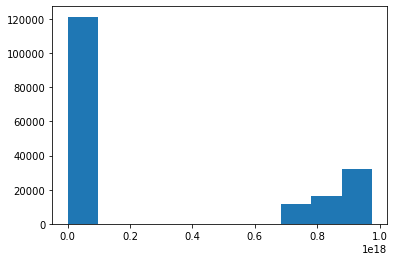

In [33]:
import matplotlib.pyplot as plt
plt.hist(PsiS)

In [34]:
Infl_aux = {r: len(FollowGraph[r]) for r in FollowGraph}

In [35]:
Infl = {r: Infl_aux[r] for r in sorted(Infl_aux, key=Infl_aux.get, reverse=True)} #We sort by followers

In [36]:
print(max([len(FollowGraph[r]) for r in FollowGraph]))

7833


(array([10327.,     0.,     0.,     0.,     0.,     0.,     0.,   724.,
         1131.,  1793.]),
 array([1.33520000e+04, 9.75681567e+16, 1.95136313e+17, 2.92704470e+17,
        3.90272627e+17, 4.87840783e+17, 5.85408940e+17, 6.82977097e+17,
        7.80545254e+17, 8.78113410e+17, 9.75681567e+17]),
 <BarContainer object of 10 artists>)

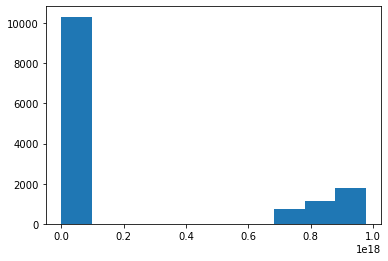

In [37]:
plt.hist(Infl) #We plot the histogram

In [44]:
#Auxiliar functions that we use to evaluate our results, namely auxiliar functions to evaluate points in the real objective function

def w(alps,pNewsS,k):
    aux=0
    for user in alps:
        if pNewsS[k].get(user)!=None:
            if user!=k:
                aux=aux+alps[user]*pNewsS[k][user]
    return aux

    
def function(x):
    x = reshape(x,U)
    y={}
    alps_aux={}
    for i in range(0,U):
        y[i] = x[:,i]
        for j in range(0,len(x[:,i])):
            alps_aux[users[i]]=x[j,i]
    ROI=0
    for i in range(0,U):
        ROI+=math.log((w(alps_aux,pNewsS,users[i])+1))
    #noise = np.random.normal(0,1)
    return -(ROI)

### Bayesian optimization framework

In [46]:
import GPyOpt
import GPy
import numpy as np

In [47]:
def reshape(x,input_dim):
    '''
    Reshapes x into a matrix with input_dim columns
    '''
    x = np.array(x)
    if x.size ==input_dim:
        x = x.reshape((1,input_dim))
    return x

In [61]:
#OSP portfolio optimization solutions to find the real optimum and to compare
def OSP_Fairness(Us,Budget,infl,costsv,restrictions):
    alps=[0] * len(Us)
    Dt={}
    for user in range(0,len(infl)):
        Dt[user]=infl[user]/costsv[user]
    Sor=dict(sorted(Dt.items(), key=lambda item: item[1], reverse=True))
    Baux=Budget
    for iaux in Sor:
        if Baux>0:
            if Baux>costsv[iaux]*restrictions[iaux]:
                if restrictions[iaux]!=0:
                    alps[iaux]=restrictions[iaux]
                    Baux=Baux-costsv[iaux]*restrictions[iaux]
            else:
                alps[iaux]=Baux/costsv[iaux]
                Baux=0
        else:
            break
    return alps

In [62]:
def OSP_FW(v0,pNewsS,Budget,Costs,restriction,alpha,weight,it=100,eps=0.000001):
    #Function which computes the participation rates by the Frank-Wolfe (FW) algorithm adaptation with initial point in v0 and a stopping condition in the number of total steps (at most it) and the maximum FW optimum gap to stop the algorithm (eps)
    #We start to measure the time of our algorithm after of prior computations
    start = time.time() 
    v_old={} #Initial
    normdiff = 2*eps #Infinite norm
    for user in v0:
        v_old[user]=v0[user]
    t = 0
    while t<=it:
        G=grad(pNewsS,v_old,alpha,weight)
        [s,normdiff]=direction(G,Costs,Budget,restriction,v_old)
        if normdiff<eps:
            break
        else:
            ak=2/(t+2)
            for user in v_old:
                if s.get(user)!=None:
                    v_old[user]=(1-ak)*v_old[user]+ak*s[user]
                else:
                    v_old[user]=(1-ak)*v_old[user]
            for user in s:
                if v_old.get(user)==None:
                    v_old[user]=ak*s[user]
            t=t+1
    #We end to measure the time of our algorithm after of prior computations
    end = time.time()
    return [v_old,normdiff,end-start]

In [63]:
def direction(G,Costs,Budget,restriction,v_old):
    #This function solves our Algorithm 1 in the manuscript in each step of OSP_FW
    #We find the average impression ratios and the average engagement ratios.
    rates={}
    for user in G:
        if Costs.get(user)!=None:
            rates[user]=G[user]/Costs[user]
    alps={} #Dictionary where we store participation ratios.
    Baux=Budget #Auxiliar variable which represents surplus budget per step.
    iList=collections.OrderedDict(sorted(rates.items(), key=lambda x:x[1],reverse=True)) #We sort the user index by increasing rates.
    for iaux in iList.keys():
        if Baux>0:
            if Baux>Costs[iaux]*restriction[iaux]:
                if restriction[iaux]!=0:
                    alps[iaux]=restriction[iaux]
                    Baux=Baux-Costs[iaux]*restriction[iaux]
            else:
                alps[iaux]=Baux/Costs[iaux]
                Baux=0
    Op=0
    for user in G:
        if alps.get(user)!=None:
            if v_old.get(user)!=None:
                Op=Op+(G[user])*(alps[user]-v_old[user])
            else:
                Op=Op+(G[user])*(alps[user])
        else:
            if v_old.get(user)!=None:
                Op=Op+(G[user])*(-v_old[user])
    return [alps,Op]

def grad(pNewsS,v_old,alpha,weight): 
    #Function which computes the gradient direction in each step of OSP_FW
    Grad={}
    for user1 in pNewsS:
        Auxiliar=der_fairness(w(v_old,pNewsS,user1),alpha,weight)
        for user2 in pNewsS[user1]:
            if Grad.get(user2)!=None:
                Grad[user2]=Grad[user2]+Auxiliar*pNewsS[user1][user2]
            else:
                Grad[user2]=Auxiliar*pNewsS[user1][user2]
    return Grad


def fairness(x,alpha,weight): #alpha-fairness utility functions
    return weight*((x+1)**(1-alpha)-1)/(1-alpha)


def der_fairness(x,alpha,weight): 
    #Auxiliar function which computes U'_j for the alpha-fairness utility functions
    return weight*((x+1)**(-alpha))

def Optimum(P,f,vec_a): 
    #Auxiliar evaluation function which computes f(\omega^{(j)}(vec_a)) where P are the average impressions ratios
    Omega={}
    sum_aux2=0
    for user in P:
        sum_aux2=0
        for user2 in P[user]:
            if user2 in vec_a:
                if user2!=user:
                    sum_aux2=sum_aux2+vec_a[user2]*P[user][user2]
        Omega[user]=sum_aux2
    sum_aux=0
    for user in Omega:
        if user!=i:
            sum_aux=f(Omega[user])+sum_aux
    return [-sum_aux,Omega]

### We run the algorithm until increase 30 variables and pick where the maximum of the optimum is reached


In [68]:
def BayOpt(B, t, ip=1, max_time  = None, max_iter  = 5, tolerance = 1e-8):
    #bud=budget, t=max number of variables, ip=initial points
    it=1
    Sol=[]
    dv=it
    Opti=[]
    dif=0.1
    Opt=0
    Opti.append(0)
    while it<t:
        costsv=[]
        infl=[]
        users=[]
        restrictions=[]
        cont=1
        U=it
        def function(x):
            x = reshape(x,U)
            y={}
            alps_aux={}
            for i in range(0,U):
                y[i] = x[:,i]
                for j in range(0,len(x[:,i])):
                    alps_aux[users[i]]=x[j,i]
            ROI=0
            for i in range(0,U):
                ROI+=math.log((w(alps_aux,pNewsS,users[i])+1))
            #noise = np.random.normal(0,1)
            return -(3*B*ROI)
        for user in Infl:
            if cont<=U:
                users.append(user)
                infl.append(Infl[user])
                costsv.append(costs[user])
                restrictions.append(restricts[user])
                cont=cont+1
            else:
                break
        space =[{'name': 'var_'+str(i), 'type': 'continuous', 'domain': [0,1]} for i in range(0,U)]
        string=''
        for i in range(0,U):
            if i!=U-1: 
                string+='x[:,'+str(i)+'] *'+str(costsv[i])+'+'
            else: 
                string+='x[:,'+str(i)+'] *'+str(costsv[i])+str(-B)
        constraints = [{'name': 'constr_1', 'constraint': string}]
        feasible_region = GPyOpt.Design_space(space = space, constraints = constraints)
        # --- CHOOSE the intial design
        initial_design = GPyOpt.experiment_design.initial_design('random', feasible_region, ip, costsv, B)
        # --- CHOOSE the objective
        objective = GPyOpt.core.task.SingleObjective(function)
        # --- CHOOSE the model type
        model = GPyOpt.models.GPModel(exact_feval=True,optimize_restarts=10,verbose=False)
        # --- CHOOSE the acquisition optimizer
        aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(feasible_region)
        # --- CHOOSE the type of acquisition
        acquisition = GPyOpt.acquisitions.AcquisitionEI(model, feasible_region, optimizer=aquisition_optimizer)
        # --- CHOOSE a collection method
        evaluator = GPyOpt.core.evaluators.Sequential(acquisition)
        # BO object
        bo = GPyOpt.methods.ModularBayesianOptimization(model, feasible_region, objective, acquisition, evaluator, initial_design)
        # Run the optimization                                                  
        bo.run_optimization(costsv, B, max_iter = max_iter, max_time = max_time, eps = tolerance, verbosity=False) 
        #bo.plot_convergence()
        maxi=max(Opti)
        Opti.append(-function(bo.x_opt))
        if Opti[it]>maxi:
            Sol=np.round(bo.x_opt,3)
            Opt=Opti[it]
            dv=it
            mod=bo
        it+=1
    return [Opt,Sol,dv,mod,Opti]

In [85]:
seed(20)
Var=30
B=15
Const=3*B*1.3
Initial_Points=1
max_iter  = 30
Solution=BayOpt(B, Var, Initial_Points, max_iter=max_iter)

### Case M=30

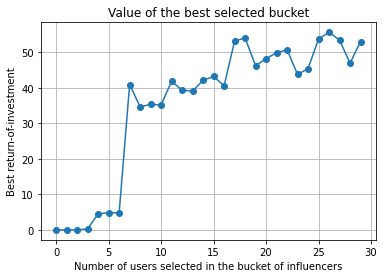

In [86]:
plt.plot(list(range(len(Solution[4]))),Solution[4],'-o')
plt.title('Value of the best selected bucket')
plt.xlabel('Number of users selected in the bucket of influencers')
plt.ylabel('Best return-of-investment')
plt.grid()
plt.savefig('fr30.png', dpi=300)

In [87]:
print('The solution vector until',Var,'variables has',Solution[2],'variables after of',max_iter,'iterations, reach an optimum of ',Solution[0],'and is:',Solution[1])

The solution vector until 30 variables has 26 variables after of 30 iterations, reach an optimum of  55.584256536503744 and is: [0.03  0.007 0.025 0.021 0.028 0.941 0.    0.    0.    0.003 0.089 0.
 0.    0.092 0.    0.018 0.074 0.012 0.    0.125 0.098 0.011 0.    0.084
 1.    0.002]


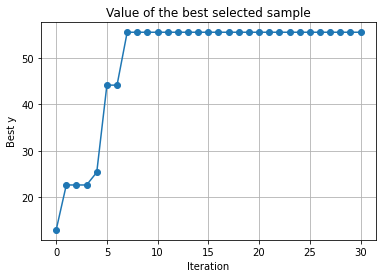

<Figure size 432x288 with 0 Axes>

In [88]:
Solution[3].plot_convergence()
plt.savefig('fs30.png', dpi=300)

In [73]:
U=Solution[2]
costsv=[]
infl=[]
users=[]
restrictions=[]
cont=1
for user in Infl:
    if cont<=U:
        users.append(user)
        infl.append(Infl[user])
        costsv.append(costs[user])
        restrictions.append(restricts[user])
        cont=cont+1
    else:
        break
Heu=OSP_Fairness(users,B,infl,costsv,restrictions)
Cost={}
rest={}
Init={}
cont=0
for i,j in zip(users,costsv):
    Cost[i]=j
    rest[i]=1
    Init[i]=Heu[cont]
    cont+=1
alpha=0.9999 
weight=1
RSol=OSP_FW(Init,pNewsS,B,Cost,rest,alpha,weight,it=30)
Rvec=np.zeros(U)
cont=0
for uss in users:
    if RSol[0].get(uss)!=None:
        Rvec[cont]=RSol[0][uss]
    cont+=1
ROpti=-function(Rvec)

In [74]:
print('The real optimum is',Const*ROpti,'with a solution vector of',Rvec,'for',U,'variables')

The real optimum is 58.7897930821516 with a solution vector of [0.         0.         0.         0.         0.         0.58323495
 0.         0.         0.         0.         0.         0.18489109
 0.         0.         0.         0.         0.         0.
 0.         0.         0.99220676 0.         0.         1.
 1.         0.        ] for 26 variables


### Case M<30 (M=15)

In [89]:
seed(10)
Var=30
B=15
Initial_Points=1
max_iter  = 15
Solution=BayOpt(B, Var, Initial_Points, max_iter=max_iter)

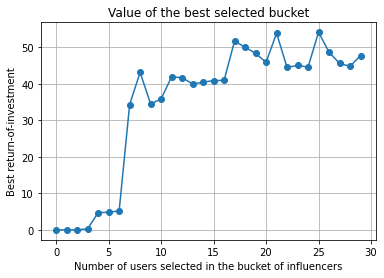

In [90]:
plt.plot(list(range(len(Solution[4]))),Solution[4],'-o')
plt.title('Value of the best selected bucket')
plt.xlabel('Number of users selected in the bucket of influencers')
plt.ylabel('Best return-of-investment')
plt.grid()
plt.savefig('fr15.png', dpi=300)

In [91]:
print('The solution vector until',Var,'variables has',Solution[2],'variables after of',max_iter,'iterations, reach an optimum of ',Solution[0],'and is:',Solution[1])

The solution vector until 30 variables has 25 variables after of 15 iterations, reach an optimum of  54.08314855714174 and is: [0.    0.019 0.308 0.026 0.061 0.702 0.    0.001 0.01  0.    0.028 0.178
 0.003 0.003 0.033 0.    0.005 0.011 0.012 0.    0.    0.006 0.032 0.032
 1.   ]


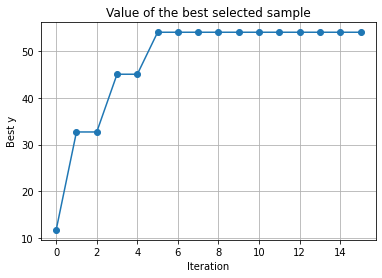

<Figure size 432x288 with 0 Axes>

In [92]:
Solution[3].plot_convergence()
plt.savefig('fs15.png', dpi=300)

### Case M<<30 (M=5)

In [93]:
seed(10)
Var=30
B=15
Initial_Points=1
max_iter  = 5
Solution=BayOpt(B, Var, Initial_Points, max_iter=max_iter)

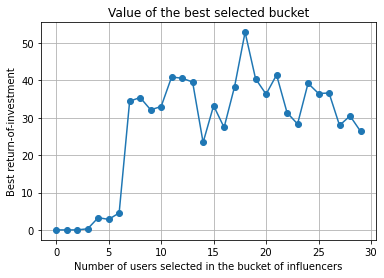

In [94]:
plt.plot(list(range(len(Solution[4]))),Solution[4],'-o')
plt.title('Value of the best selected bucket')
plt.xlabel('Number of users selected in the bucket of influencers')
plt.ylabel('Best return-of-investment')
plt.grid()
plt.savefig('fr5.png', dpi=300)

In [95]:
print('The solution vector until',Var,'variables has',Solution[2],'variables after of',max_iter,'iterations, reach an optimum of ',Solution[0],'and is:',Solution[1])

The solution vector until 30 variables has 18 variables after of 5 iterations, reach an optimum of  52.832243695614785 and is: [0.012 0.006 0.666 0.008 0.028 1.    0.009 0.037 0.005 0.006 0.129 0.002
 0.01  0.205 0.03  0.087 0.036 0.008]


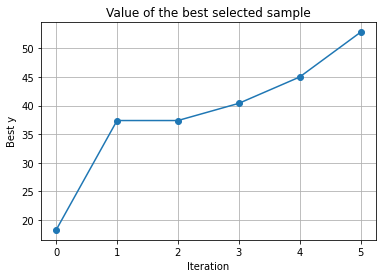

<Figure size 432x288 with 0 Axes>

In [96]:
Solution[3].plot_convergence()
plt.savefig('fs5.png', dpi=300)

The plots above illustrate in a measure of influence of followers with a long, medium and short horizon respectively, how the value of the selected bucket of influencers varies as we increase the cardinality in the bucket of influencers. Once the best cardinality of the bucket of influencers has been found, moreover it shows the value of the best selected sample over the horizon fixed by the advertiser (i.e. in each change of the participation rates). 


Let us observe that on the previous figures we have the behaviour mentioned. Specifically, as we add users to the sequential budgeted portfolio optimization problem [BPO-BO] the optimum found by the boosted Algorithm with the above Lemma improves until a certain size of users in the network $\hat{N}$ is reached. Such $\hat{N}$ is $26$, $25$ and $18$ in the case of a measure of influence of followers with a long, medium and short horizon respectively. Once past such $\hat{N}$, and because the size of the feasible set increases, we tend to require longer horizons $M$ to reach a better optimum, and so we experience the curse of dimensionality. The above can be visualised with drops in the value of the selected bucket of influencers for different cardinalities once such $\hat{N}$ is exceeded. Hencer shorter horizons require fewer users until the curse of dimensionality begins to take effect.

Once the best cardinality of the bucket of influencers has been found, we obtain the below table, which, shows the optimums found for both measures of influence and different horizons and the real optimum found by the budgeted portfolio optimization problem [BPO-G]. Note that both methods are realistically close to the actual optimum given by [BPO-G], therefore the sequential budgeted portfolio optimization problem [BPO-BO] by the boosted Algorithm and Lemma correctly models reality. Besides, we observe that a measure of influence of followers with a short horizon is closer to the real optimum than a measure of influence of long horizon. Thus, regardless the horizon, we conclude that the measure of influence of followers best captures the sequential budgeted portfolio optimization problem [BPO-BO].

Finally and interestingly, we observe from below table that, regardless measure of influence, we have a property of diminishing returns in the optimums as the horizons increase. We attribute the above characteristic to the property of diminishing returns on the return-of-investment $U$.

| Measure of influence \& Horizon | Optimum |
| :- | :-: |
| Real optimum | 58.789 | 
| Followers with long horizon | 55.584 | 
| Followers with medium horizon | 54.083 |
| Followers with short horizon | 52.832 | 
| Impressions with long horizon | 52.557 | 
| Impressions with medium horizon | 47.895 |
| Impressions with short horizon | 42.097 | 